### Binary Tree Level Order Traversal
---
Given the root of a binary tree, return the level order traversal of its nodes' values. (i.e., from left to right, level by level).

|Input|Output|Explanation|
|:--|:--|:--|
|root = [3,9,20,null,null,15,7]|[[3],[9,20],[15,7]]||
|root = [1]|[[1]]||
|root = []|[]||
>$Constraints:$  
>- $The$ $number$ $of$ $nodes$ $in$ $the$ $tree$ $is$ $in$ $the$ $range$ $[0, 2000].$
>- $-1000 <= Node.val <= 1000$

In [1]:
import java.time.Duration;
import java.time.Instant;
import java.util.Collections.*;
import java.util.stream.*;

class TreeNode {
    int val;
    TreeNode left;
    TreeNode right;
    TreeNode() {}
    TreeNode(int val) { this.val = val; }
    TreeNode(int val, TreeNode left, TreeNode right) {
        this.val = val;
        this.left = left;
        this.right = right;
    }
}

In [2]:
class Solution {
    public List<List<Integer>> levelOrder(TreeNode root) {
        List<List<Integer>> result = new ArrayList<>();
        if(root == null) return result;
        Queue<TreeNode> queue = new LinkedList<>();
        queue.add(root);
        result.add(new ArrayList(Arrays.asList(root.val)));
        
        while(!queue.isEmpty()){
            TreeNode currentNode = queue.poll();
            List<TreeNode> children = new ArrayList(Arrays.asList(currentNode.left, currentNode.right));
            children.removeAll(Collections.singletonList(null));
            if (!children.isEmpty()) {
                children.stream().forEach(queue::add);
                result.add(children.stream().map(x -> x.val).collect(Collectors.toList()));
            }
        }
        return result;
    }
}

In [8]:
List<List<Integer>> children = new ArrayList<>();
TreeNode left = new TreeNode(2);
TreeNode right = new TreeNode(3);
TreeNode root = new TreeNode(1,left,right);
Solution solution = new Solution();

/* Measure execution time */
Instant start = Instant.now();
List<List<Integer>>  result = solution.levelOrder(root);
Instant finish = Instant.now();
result

[[1], [2, 3]]

In [9]:
Duration.between(start, finish).toMillis();

34

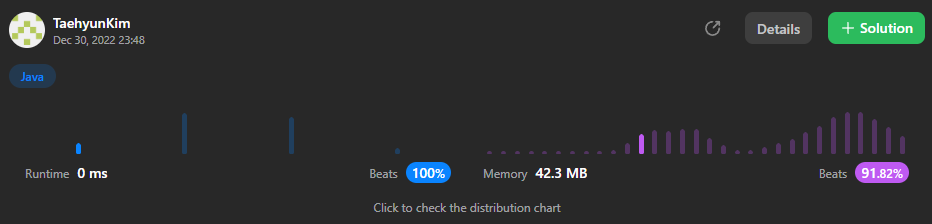

### Java Solution using DFS
---

In [5]:
class Solution {
    public List<List<Integer>> levelOrder(TreeNode root) {
        List<List<Integer>> res = new ArrayList<List<Integer>>();
        levelHelper(res, root, 0);
        return res;
    }

    public void levelHelper(List<List<Integer>> res, TreeNode root, int height) {
        if (root == null) return;
        if (height >= res.size()) {
            res.add(new LinkedList<Integer>());
        }
        res.get(height).add(root.val);
        levelHelper(res, root.left, height+1);
        levelHelper(res, root.right, height+1);
    }
}

In [6]:
Solution DfsSolution = new Solution();

/* Measure execution time */
start = Instant.now();
List<List<Integer>> dfsResult = DfsSolution.levelOrder(root);
finish = Instant.now();
dfsResult

[[1], [2, 3]]

In [7]:
Duration.between(start, finish).toMillis();

30